In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.svm import SVC

### Data preparation

In [2]:
noise = 0.08 #바꾸어보세요

In [3]:
X, Y = make_circles(n_samples = 1000, noise = noise)

In [4]:
X.shape

(1000, 2)

In [5]:
Y.shape

(1000,)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #보통 0.2 또는 0.3을 합니다.

In [8]:
X_train.shape

(800, 2)

In [9]:
X_test.shape

(200, 2)

In [10]:
y_test.shape

(200,)

### Defining a SVM model

In [11]:
model1 = SVC(kernel = 'rbf')

In [12]:
%%time
model1.fit(X_train, y_train) #Train 데이터 만을 이용합니다.

CPU times: user 12.6 ms, sys: 235 µs, total: 12.8 ms
Wall time: 12.3 ms


/home/seung/.venv/tf200py368/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    Z = model.predict(np.array([XX.ravel(), YY.ravel()]).T)
    ZZ = np.reshape(Z, XX.shape)
    fig = plt.figure(figsize=(7,7))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

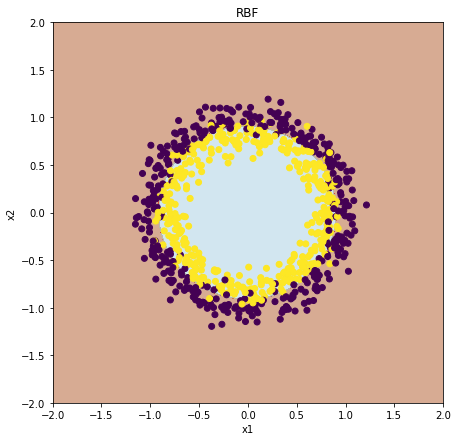

In [14]:
PlotSVM(X_train, y_train, model1, title='RBF')

In [15]:
'RBF {}'.format(noise)

'RBF 0.08'

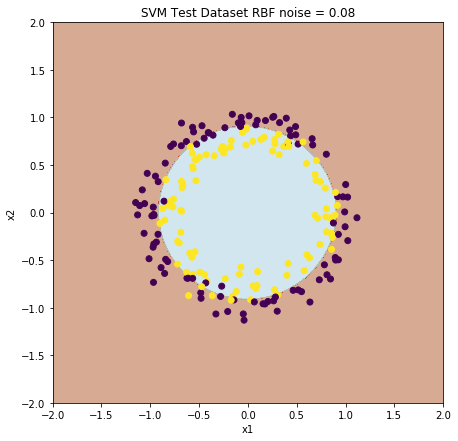

In [16]:
PlotSVM(X_test, y_test, model1, title='SVM Test Dataset RBF noise = {}'.format(noise))

### Prediction & Evaluation

In [17]:
predictions = model1.predict(X_test)

In [18]:
predictions #예측 결과

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0])

In [19]:
y_test # 정답 (사전에 잘라 두었던 20%)

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [20]:
model1.score(X_test, y_test)

0.89

### Confusion Matrix

In [21]:
import pandas as pd

In [22]:
conf_matrix = pd.crosstab(y_test, predictions)
print(conf_matrix)

col_0   0   1
row_0        
0      91  11
1      11  87


In [23]:
y_test.shape

(200,)

In [24]:
predictions.shape

(200,)